In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Cargar resultados ===
df = pd.read_csv("evaluation_summary_cases.csv")

# === 2. Definir etiquetas cualitativas para cada caso ===
metadata = {
    "CASE01": {"ambiguity": "medium", "abstraction": "conceptual", "structure": "explorative"},
    "CASE02": {"ambiguity": "low",    "abstraction": "technical",   "structure": "procedural"},
    "CASE03": {"ambiguity": "high",   "abstraction": "conceptual",  "structure": "explorative"},
    "CASE04": {"ambiguity": "medium", "abstraction": "conceptual",  "structure": "procedural"},
    "CASE05": {"ambiguity": "medium", "abstraction": "conceptual",  "structure": "procedural"},
    "CASE06": {"ambiguity": "medium", "abstraction": "conceptual",  "structure": "explorative"},
    "CASE07": {"ambiguity": "low",    "abstraction": "technical",   "structure": "procedural"},
    "CASE08": {"ambiguity": "medium", "abstraction": "conceptual",  "structure": "procedural"},
    "CASE09": {"ambiguity": "low",    "abstraction": "technical",   "structure": "procedural"},
    "CASE10": {"ambiguity": "high",   "abstraction": "conceptual",  "structure": "explorative"},
}

df["ambiguity"] = df["case_id"].map(lambda x: metadata[x]["ambiguity"])
df["abstraction"] = df["case_id"].map(lambda x: metadata[x]["abstraction"])
df["structure"] = df["case_id"].map(lambda x: metadata[x]["structure"])

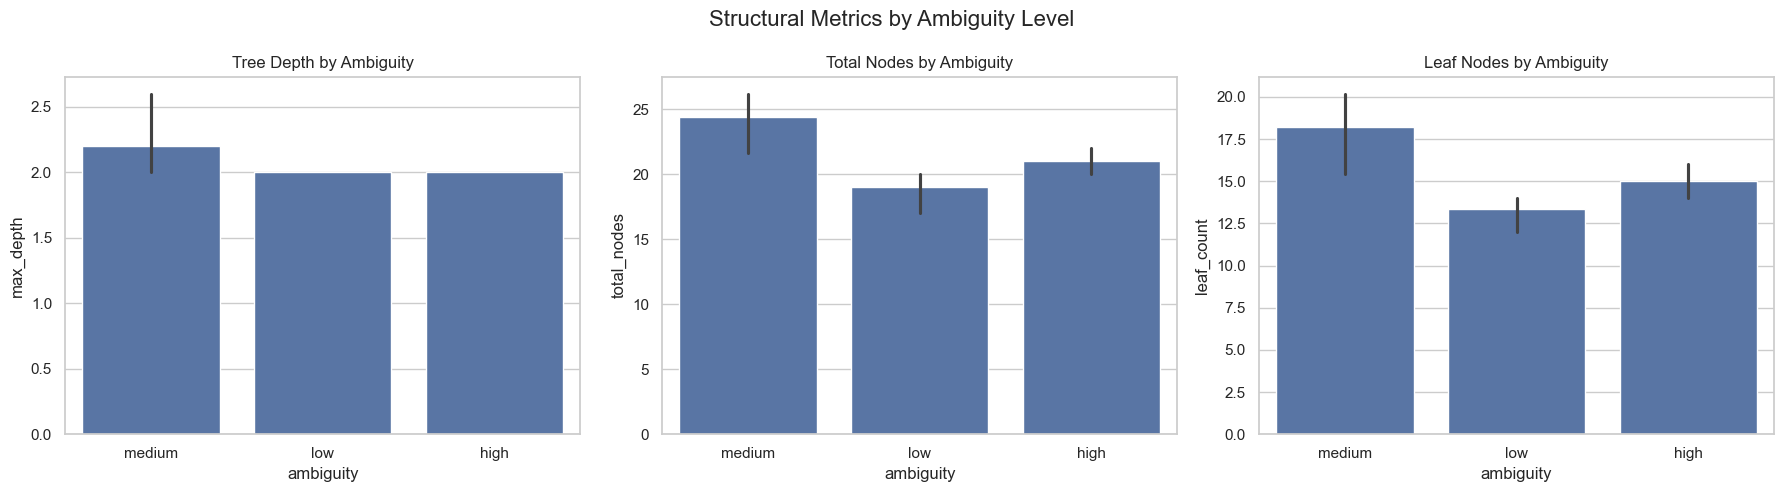

In [43]:
# === 3. Visualización: Ambigüedad vs Métricas ===
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=df, x="ambiguity", y="max_depth", ax=axes[0])
axes[0].set_title("Tree Depth by Ambiguity")

sns.barplot(data=df, x="ambiguity", y="total_nodes", ax=axes[1])
axes[1].set_title("Total Nodes by Ambiguity")

sns.barplot(data=df, x="ambiguity", y="leaf_count", ax=axes[2])
axes[2].set_title("Leaf Nodes by Ambiguity")

plt.suptitle("Structural Metrics by Ambiguity Level", fontsize=16)
plt.tight_layout()
plt.show()

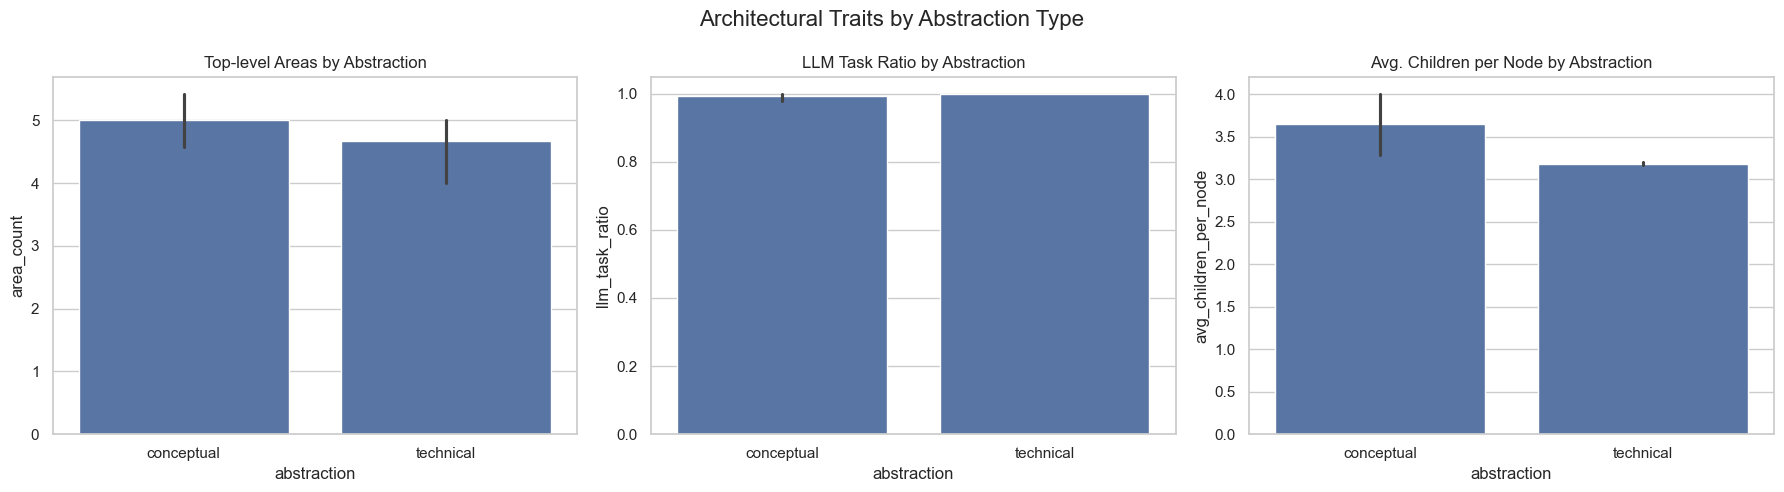

In [44]:
# === 4. Visualización: Abstracción vs Métricas ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=df, x="abstraction", y="area_count", ax=axes[0])
axes[0].set_title("Top-level Areas by Abstraction")

sns.barplot(data=df, x="abstraction", y="llm_task_ratio", ax=axes[1])
axes[1].set_title("LLM Task Ratio by Abstraction")

sns.barplot(data=df, x="abstraction", y="avg_children_per_node", ax=axes[2])
axes[2].set_title("Avg. Children per Node by Abstraction")

plt.suptitle("Architectural Traits by Abstraction Type", fontsize=16)
plt.tight_layout()
plt.show()

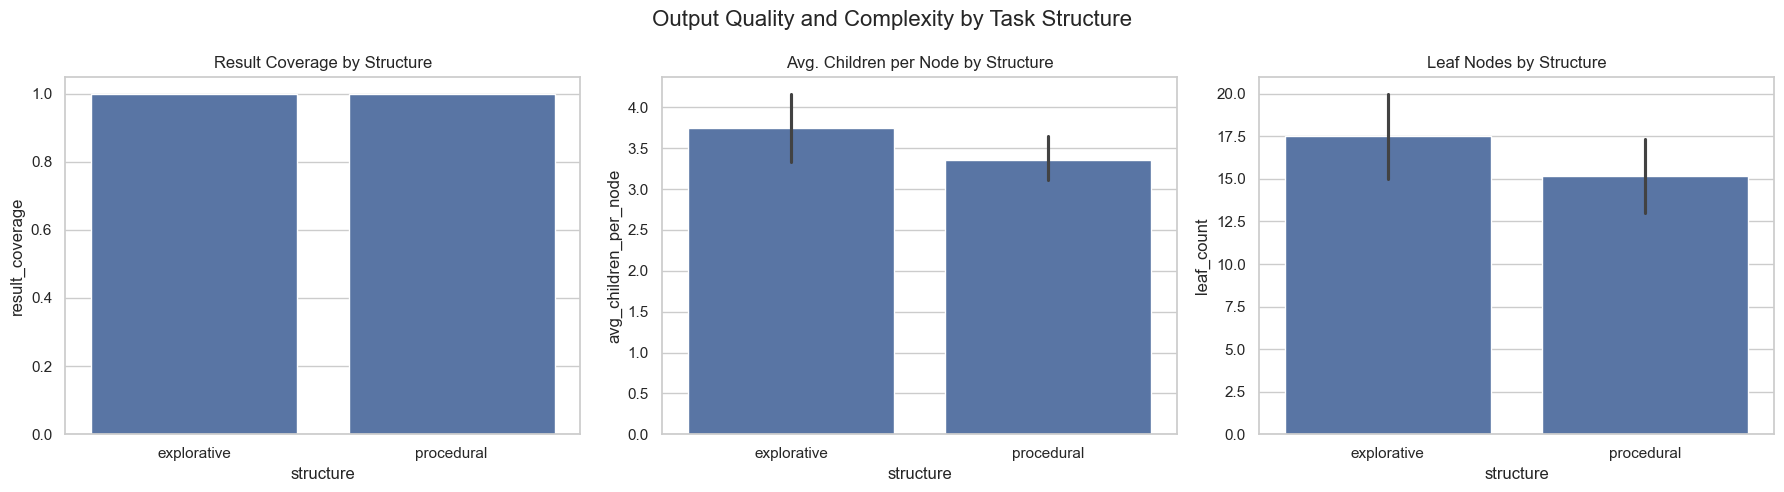

In [45]:
# === 5. Visualización: Estructurabilidad vs Métricas ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=df, x="structure", y="result_coverage", ax=axes[0])
axes[0].set_title("Result Coverage by Structure")

sns.barplot(data=df, x="structure", y="avg_children_per_node", ax=axes[1])
axes[1].set_title("Avg. Children per Node by Structure")

sns.barplot(data=df, x="structure", y="leaf_count", ax=axes[2])
axes[2].set_title("Leaf Nodes by Structure")

plt.suptitle("Output Quality and Complexity by Task Structure", fontsize=16)
plt.tight_layout()
plt.show()

# Evaluation of StratMind Architecture Across Task Complexity Dimensions

## Overview

This document presents an analytical evaluation of the performance of the **StratMind** architecture, designed for autonomous hierarchical task decomposition and resolution using LLM-based agents. We conducted controlled evaluations over 10 carefully designed tasks (CASE01–CASE10), each representing a different type of complexity in terms of **ambiguity**, **level of abstraction**, and **structurability**.

---

## Qualitative Labeling of Tasks

Each case was annotated with three high-level cognitive complexity dimensions:

| Case ID | Ambiguity | Abstraction | Structure   |
| ------- | --------- | ----------- | ----------- |
| CASE01  | Medium    | Conceptual  | Explorative |
| CASE02  | Low       | Technical   | Procedural  |
| CASE03  | High      | Conceptual  | Explorative |
| CASE04  | Medium    | Conceptual  | Procedural  |
| CASE05  | Medium    | Conceptual  | Procedural  |
| CASE06  | Medium    | Conceptual  | Explorative |
| CASE07  | Low       | Technical   | Procedural  |
| CASE08  | Medium    | Conceptual  | Procedural  |
| CASE09  | Low       | Technical   | Procedural  |
| CASE10  | High      | Conceptual  | Explorative |

---

## Key Metrics from Tree Evaluation

For each task, we analyzed the generated task tree using the following metrics:

* `total_nodes`: total number of nodes (tasks and subtasks)
* `max_depth`: depth of the tree
* `area_count`: number of first-level subtasks (main areas)
* `avg_children_per_node`: average branching factor
* `leaf_count`: number of terminal nodes (without subtasks)
* `llm_task_ratio`: proportion of tasks delegated to LLM agents
* `result_coverage`: proportion of tasks that produced a valid result

---

## Findings

### 1. Full Execution and Result Coverage

* **Result coverage was 100%** for all cases except one (`CASE05`), which had a coverage of 0.947.
* This indicates the architecture's **robustness in fully resolving all generated subtasks**, regardless of the task type.
* Even in **high-ambiguity cases** (`CASE03`, `CASE10`), the system managed to produce coherent and complete decompositions.

---

### 2. High LLM Utilization

* `llm_task_ratio` remained at **1.0 for 9 out of 10 cases**, suggesting that the delegation strategy to LLM agents is consistent and reliable.
* The only exception (`CASE05`, a procedural but experiential planning task) had a slightly lower ratio (0.947), possibly due to simple nodes resolved via fixed logic.

---

### 3. Structural Efficiency and Consistency

* **Tree depth remained shallow** (mostly depth = 2, only `CASE05` had depth = 3), promoting **clarity and interpretability** in the task hierarchy.
* **Branching factor (avg\_children\_per\_node)** ranged between **3.0 and 4.3**, suggesting a **healthy granularity** in decomposition.

---

### 4. Adaptability Across Dimensions

* **Ambiguity**: The architecture handled both **low-ambiguity technical tasks** (`CASE02`, `CASE07`, `CASE09`) and **highly ambiguous conceptual challenges** (`CASE03`, `CASE10`) with similar structural integrity and completion.
* **Abstraction**: Across both **technical** and **conceptual** tasks, result coverage remained stable, and tree complexity adapted appropriately.
* **Structure**: The system showed slightly **higher node counts and branching** in explorative cases, as expected. This reflects an ability to expand in the face of open-ended prompts (e.g., `CASE06` and `CASE10`).

---

## Potential Limitations

### Shallow Depth Across All Tasks

* **Max depth = 2** in 9 out of 10 cases may suggest **under-decomposition**, particularly in complex conceptual tasks like `CASE10` (global poverty eradication).
* Future work could explore enabling **deeper recursive decomposition** when dealing with multi-scale or multi-stakeholder problems.

### Lack of Differentiation in Procedural Tasks

* Procedural tasks (`CASE02`, `CASE04`, `CASE05`, `CASE07`, `CASE09`) produced trees with similar shape and size, despite differences in domain and granularity.
* This suggests a potential **bias toward uniform structural templates**, which could limit the model’s expressiveness.

---

## Conclusion

The StratMind architecture exhibits **strong structural reliability**, **consistent execution**, and **flexible adaptation** across tasks of varying ambiguity, abstraction level, and procedural complexity. These results validate the underlying design assumptions of:

* Clear agent responsibility separation
* Effective LLM invocation strategies
* Scalable tree structure without over-complication

Nonetheless, opportunities remain to **enhance recursive decomposition**, especially in high-abstraction cases, and to increase **structural diversity** in response to different task types.

This evaluation lays the foundation for future benchmarking against baseline models and manual gold standards to further assess the architectural advantages of StratMind.
